Работа с временными рядами.
    
Известно ежемесячное число смертей в результате несчастного случая в США с января 1973 по декабрь 1978, необходимо построить прогноз на следующие 2 года. В конце вывести график.

In [67]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX


In [2]:
deaths_in_america=files.upload()

Saving accidental-deaths-in-usa-monthly.csv to accidental-deaths-in-usa-monthly.csv


In [70]:
df=pd.read_csv('accidental-deaths-in-usa-monthly.csv')

In [71]:
df.head()

,Month,"Accidental deaths in USA: monthly, 1973 ? 1978"
0,1973-01,9007
1,1973-02,8106
2,1973-03,8928
3,1973-04,9137
4,1973-05,10017


In [72]:
print(df.columns)

Index(['Month', 'Accidental deaths in USA: monthly, 1973 ? 1978'], dtype='object')


In [73]:
#Переименую столбцы для более понятныз названий
df = df.rename(columns={'Month': 'date', 'Accidental deaths in USA: monthly, 1973 ? 1978': 'death_count'})

In [74]:
df.describe()

,death_count
count,72.000000
mean,8787.736111
std,958.338013
min,6892.000000
25%,8089.000000
50%,8728.500000
75%,9323.250000
max,11317.000000


In [75]:
df.isna().sum()

date           0
death_count    0
dtype: int64

In [76]:
# Преобразуем столбец 'date' в формат datetime
df['date'] = pd.to_datetime(df['date'])

In [77]:
df.tail()

,date,death_count
67,1978-08-01,9827
68,1978-09-01,9110
69,1978-10-01,9070
70,1978-11-01,8633
71,1978-12-01,9240


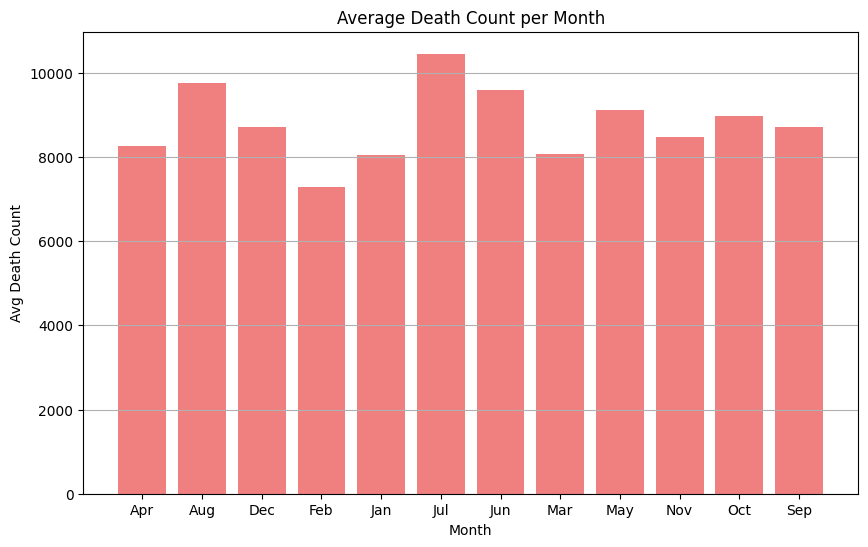

In [105]:
#Проверим есть ли зависимость смертей по месяцам, чтобы понять есть ли сезонность

# Группировка данных по месяцам и рассчет среднего значения death_count для каждого месяца
monthly_data = df.groupby(df['date'].dt.strftime('%b')).agg({'death_count': 'mean'})

# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))
plt.bar(monthly_data.index, monthly_data['death_count'], color='lightcoral')
plt.title('Average Death Count per Month')
plt.xlabel('Month')
plt.ylabel('Avg Death Count')
plt.grid(axis='y')
plt.show()

Вывод: есть некоторая зависимость от месяца, например самое низкое кол-во смертей в феврале, а самое выское в Июле

In [78]:
#Создание и обучение модели SARIMA, выбрала эту модель так как она учитывает сезонность в данных
model = SARIMAX(df['death_count'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) #12 указывает на сезонность в 12 месяцев
result = model.fit()

In [79]:
forecast = result.forecast(steps=24) #24 кол-во шагов прогноза

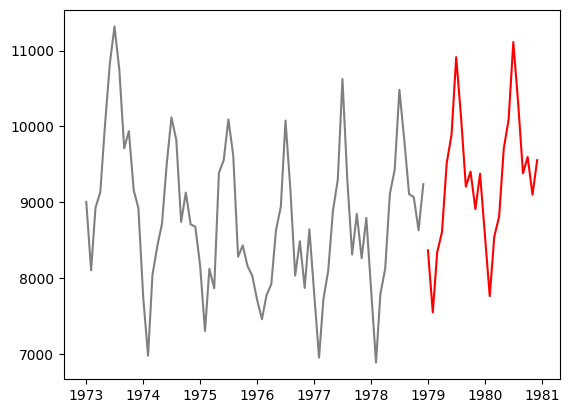

In [97]:
# Построение графика исходных данных
plt.plot(df['date'], df['death_count'], label='Initial data', color='gray')

# Построение графика прогноза
plt.plot(pd.date_range(start=df['date'].max(), periods=24, freq='M'), forecast.values, label='Forecast', color='red')

plt.show()

Вывод:по данному предсказанию кол-во смертей в следующие 2 года возрастет по сравнению с предыдущими ближайшими значениями